In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
# from scipy.stats import zscore
from scipy import stats
# from scipy.optimize import minimize, differential_evolution, NonlinearConstraint, LinearConstraint

from matplotlib import pyplot as plt
plt.style.use('./hockenberry.mplstyle')
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Pick comparison dataset

Basically trying to see how well correlated the GCI values are when they are calculated from different datasets

In [26]:
comparison_a, comparison_b = ['ecoli_full', 'ecoli_prot']
# comparison_a, comparison_b = ['ecoli_full', 'ecoli_sparse']
# comparison_a, comparison_b = ['scer_rna', 'scer_prot']

In [27]:
if comparison_a in ['ecoli_full', 'ecoli_sparse', 'ecoli_prot']:
    full_df = pd.read_csv('../Data/ecoli_info/current_ecoli_master_table.tsv', sep='\t', index_col=0)
elif comparison_a in ['scer_rna', 'scer_prot']:
    full_df = pd.read_csv('../Data/scer_info/current_scer_master_table.tsv', sep='\t', index_col=0)
else:
    raise Exception('Incorrect organism identifier')

full_df['roc_semppr_mean'] = np.log(full_df['roc_semppr_mean'])
    
print(full_df.shape)
full_df.head()

(5451, 11)


,gene,start_loc,stop_loc,strand,cds_seq,cds_len,well_behaved,GC_percent_cds,roc_semppr_mean,CAI,tAI
locus_tag,,,,,,,,,,,
CENPK1137D_4927,Gdh3p,31625.0,32998.0,+,ATGACAAGCGAACCAGAGTTTCAGCAGGCTTACGATGAGATCGTTT...,1374,True,0.485444,0.074673,0.166896,0.414135
CENPK1137D_4938,Bdh2p,33506.0,34759.0,+,ATGAGAGCCTTAGCGTATTTCGGTAAAGGTAACATCAGATTCACCA...,1254,True,0.484848,-0.580142,0.146111,0.374852
CENPK1137D_4949,Bdh1p,35211.0,36359.0,+,ATGAGAGCTTTGGCATATTTCAAGAAGGGTGATATTCACTTCACTA...,1149,True,0.449956,0.554703,0.239300,0.408900
CENPK1137D_4960,Ecm1p,36565.0,37203.0,+,ATGTGGGAACAAAGACGACAAAAGGTAGTTTTTTCCTTGACTATAC...,639,True,0.403756,-0.002188,0.180668,0.399201
CENPK1137D_4971,Cne1p,37520.0,39028.0,+,ATGAAATTTTCTGCGTATTTATGGTGGCTGTTTTTGAATCTAGCGT...,1509,True,0.433400,-1.805562,0.126947,0.323906


In [28]:
dfs = []
for data_tag in [comparison_a, comparison_b]:
    if data_tag == 'ecoli_full':
        exp_summary_df = pd.read_csv('../Data/processed_data/processed_expression_summary_ecoli.tsv', sep='\t', index_col=0)
    elif data_tag == 'ecoli_sparse':
        exp_summary_df = pd.read_csv('../Data/processed_data/processed_expression_summary_ecoli_SPARSE.tsv', sep='\t', index_col=0)
    elif data_tag == 'ecoli_prot':
        exp_summary_df = pd.read_csv('../Data/processed_data/processed_expression_summary_ecoli_PROTEIN.tsv', sep='\t', index_col=0)
        name_dict = full_df['gene'].to_dict()
        name_dict = {value:key for key, value in name_dict.items()}
        exp_summary_df.rename(index=name_dict, inplace=True)
        exp_summary_df = exp_summary_df[exp_summary_df.index.isin(name_dict.values())]
    elif data_tag == 'scer_rna':
        exp_summary_df = pd.read_csv('../Data/processed_data/processed_expression_summary_scer_RNA.tsv', sep='\t', index_col=0)
    elif data_tag == 'scer_prot':
        exp_summary_df = pd.read_csv('../Data/processed_data/processed_expression_summary_scer_PROTEIN.tsv', sep='\t', index_col=0)
    else:
        raise Exception('Incorrect organism identifier')
    dfs.append(exp_summary_df)
    
exp_summary_df_a, exp_summary_df_b = dfs
print(exp_summary_df_a.shape, exp_summary_df_b.shape)

(3127, 13) (3127, 13)


In [29]:
exp_summary_df = exp_summary_df_a.merge(exp_summary_df_b, how='inner', left_index=True, right_index=True)

**Compare the GCI values**

SpearmanrResult(correlation=0.5616011386183788, pvalue=1.901183514891294e-259)


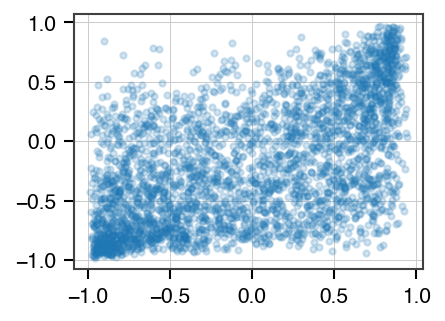

In [30]:
fig, ax = plt.subplots()
ax.scatter(exp_summary_df['lin_r_x'], exp_summary_df['lin_r_y'], marker='.', alpha=0.2)

print(stats.spearmanr(exp_summary_df['lin_r_x'], exp_summary_df['lin_r_y']))